## Info1998: Stroke Prediction
### Angelina Lu and Brittany Sun
This Stroke Predition project conducts data analysis on the Stroke Prediction Dataset (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/)

We will predict the factors that increases the chances of having a stroke in an individual. By visualizing and understanding data and applying models on trends, we hope to gather a predictive model of the features that correlate with having a stroke. 

We want to answer the following questions:
What is the correlation between age, heart_disease, hypertension, avg_glucose_level on stroke probability?

Parts:
1. Cleaning Data
2. Visualizing Data
3. Machine Learning Models
4. Analysis

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.info()
df.head()
#df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data Visualization

/var/folders/3n/cs_mxjln6yz4gpm6cyp0p3ph0000gn/T/ipykernel_92998/5935380.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stroke_ht = stroke[df['hypertension']==1]
/var/folders/3n/cs_mxjln6yz4gpm6cyp0p3ph0000gn/T/ipykernel_92998/5935380.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stroke_nonHt = stroke[df['hypertension']==0]


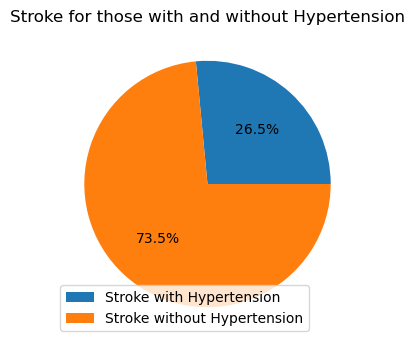

/var/folders/3n/cs_mxjln6yz4gpm6cyp0p3ph0000gn/T/ipykernel_92998/5935380.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stroke_hd = stroke[df['heart_disease']==1]
/var/folders/3n/cs_mxjln6yz4gpm6cyp0p3ph0000gn/T/ipykernel_92998/5935380.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stroke_nonHd = stroke[df['heart_disease']==0]


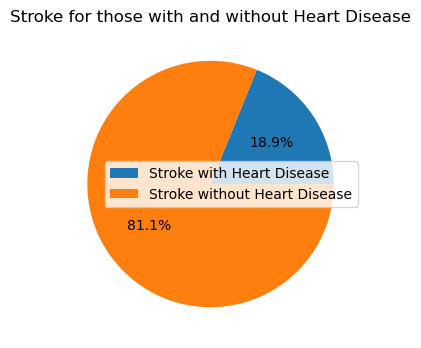

NameError: name 'explode' is not defined

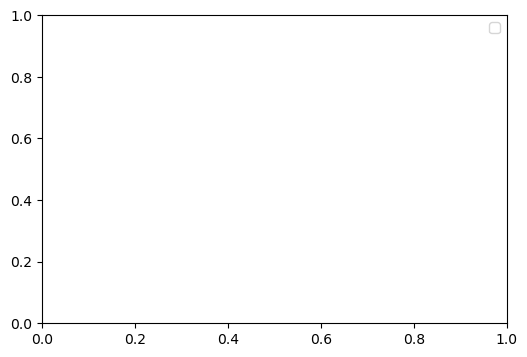

In [4]:
#Pie chart showing whether those had strokes had hypertension or not
stroke = df[df['stroke']==1]

stroke_ht = stroke[df['hypertension']==1]
stroke_nonHt = stroke[df['hypertension']==0]

plt.figure(figsize=(6, 4))
plt.pie(x=[len(stroke_ht), len(stroke_nonHt)], autopct='%1.1f%%',)
plt.legend(['Stroke with Hypertension', 'Stroke without Hypertension'])
plt.title('Stroke for those with and without Hypertension')

plt.show()
#########
#Pie chart showing whether those had strokes had heart disease or not
stroke = df[df['stroke']==1]

stroke_hd = stroke[df['heart_disease']==1]
stroke_nonHd = stroke[df['heart_disease']==0]

plt.figure(figsize=(6, 4))
plt.pie(x=[len(stroke_hd), len(stroke_nonHd)], autopct='%1.1f%%',)
plt.legend(['Stroke with Heart Disease', 'Stroke without Heart Disease'])
plt.title('Stroke for those with and without Heart Disease')

plt.show()
#########
stroke_counts = df.groupby('Residence_type')['stroke'].value_counts().unstack().fillna(0)

rural_stroke = stroke_counts.loc['Rural'].sum()
urban_stroke = stroke_counts.loc['Urban'].sum()

labels = ['Rural', 'Urban']
sizes = [rural_stroke, urban_stroke]

plt.figure(figsize=(6, 4))
plt.legend(labels)
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%')
plt.title("Stroke Rates by Residence Type")

plt.show()


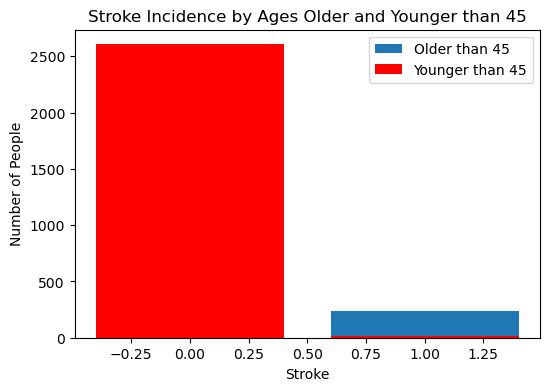

In [5]:
#Bar graph showing stroke incidence with those older and younger than the median age of sample
median = round(df['age'].median())
older_than_median = df[df['age'] > median]
younger_than_median = df[df['age'] <= median]


older_stroke_count = older_than_median['stroke'].value_counts()
younger_stroke_count = younger_than_median['stroke'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(older_stroke_count.index, older_stroke_count.values, label=f"Older than {median}")
plt.bar(younger_stroke_count.index, younger_stroke_count.values, label=f"Younger than {median}", color='red')

plt.xlabel("Stroke")
plt.ylabel("Number of People")
plt.title(f"Stroke Incidence by Ages Older and Younger than {median}")
plt.legend()

plt.show()

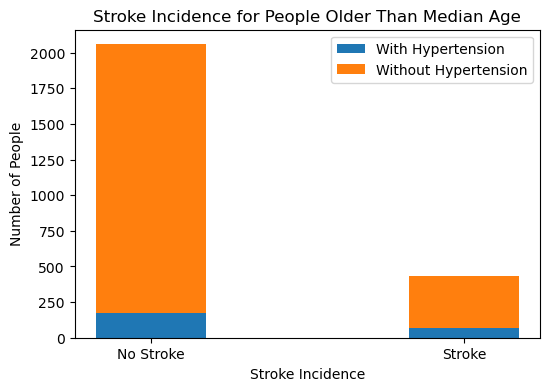

In [6]:
#Bar graph showing stroke incidence of those older than the median age with and without hypertension
older_than_median = df[df['age'] > median]

stroke_counts = older_than_median.groupby('hypertension')['stroke'].value_counts().unstack().fillna(0)

plt.figure(figsize=(6, 4))
width = 0.35

ind = range(len(stroke_counts))
bar1 = plt.bar(ind, stroke_counts[1], width, label='With Hypertension')
bar2 = plt.bar(ind, stroke_counts[0], width, label='Without Hypertension', bottom=stroke_counts[1])

plt.xlabel("Stroke Incidence")
plt.ylabel("Number of People")
plt.title("Stroke Incidence for People Older Than Median Age")
plt.xticks(ind, ['No Stroke', 'Stroke'])
plt.legend()

plt.show()

## Data Cleaning

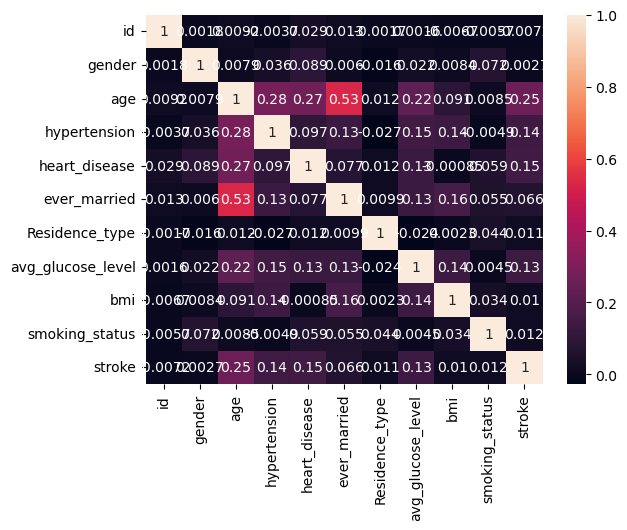

In [7]:
#correlation heat map showing correlation between columns

#converting Residence_type into numeric column
df.loc[df.Residence_type == 'Urban', "Residence_type"] = 1
df.loc[df.Residence_type == 'Rural', "Residence_type"] = 0
df["Residence_type"] = df["Residence_type"].astype('int64')

#converting ever_married into numeric column
df.loc[df.ever_married == 'Yes', "ever_married"] = 1
df.loc[df.ever_married == 'No', "ever_married"] = 0
df["ever_married"] = df["ever_married"].astype('int64')

df.drop(df[df['gender']=='Other'].index, inplace=True)

#converting gender into numeric column
df.loc[df.gender == 'Male', "gender"] = 1
df.loc[df.gender == 'Female', "gender"] = 0
df["gender"] = df["gender"].astype('int64')

df.drop(df[df['smoking_status']=='Unknown'].index, inplace=True)
df.drop(df[df['smoking_status']=='formerly smoked'].index, inplace=True)

#converting smoking_status into numeric column
df.loc[df.smoking_status == 'smokes', "smoking_status"] = 1
df.loc[df.smoking_status == 'never smoked', "smoking_status"] = 0
df["smoking_status"] = df["smoking_status"].astype('int64')

corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot=True)
plt.show()

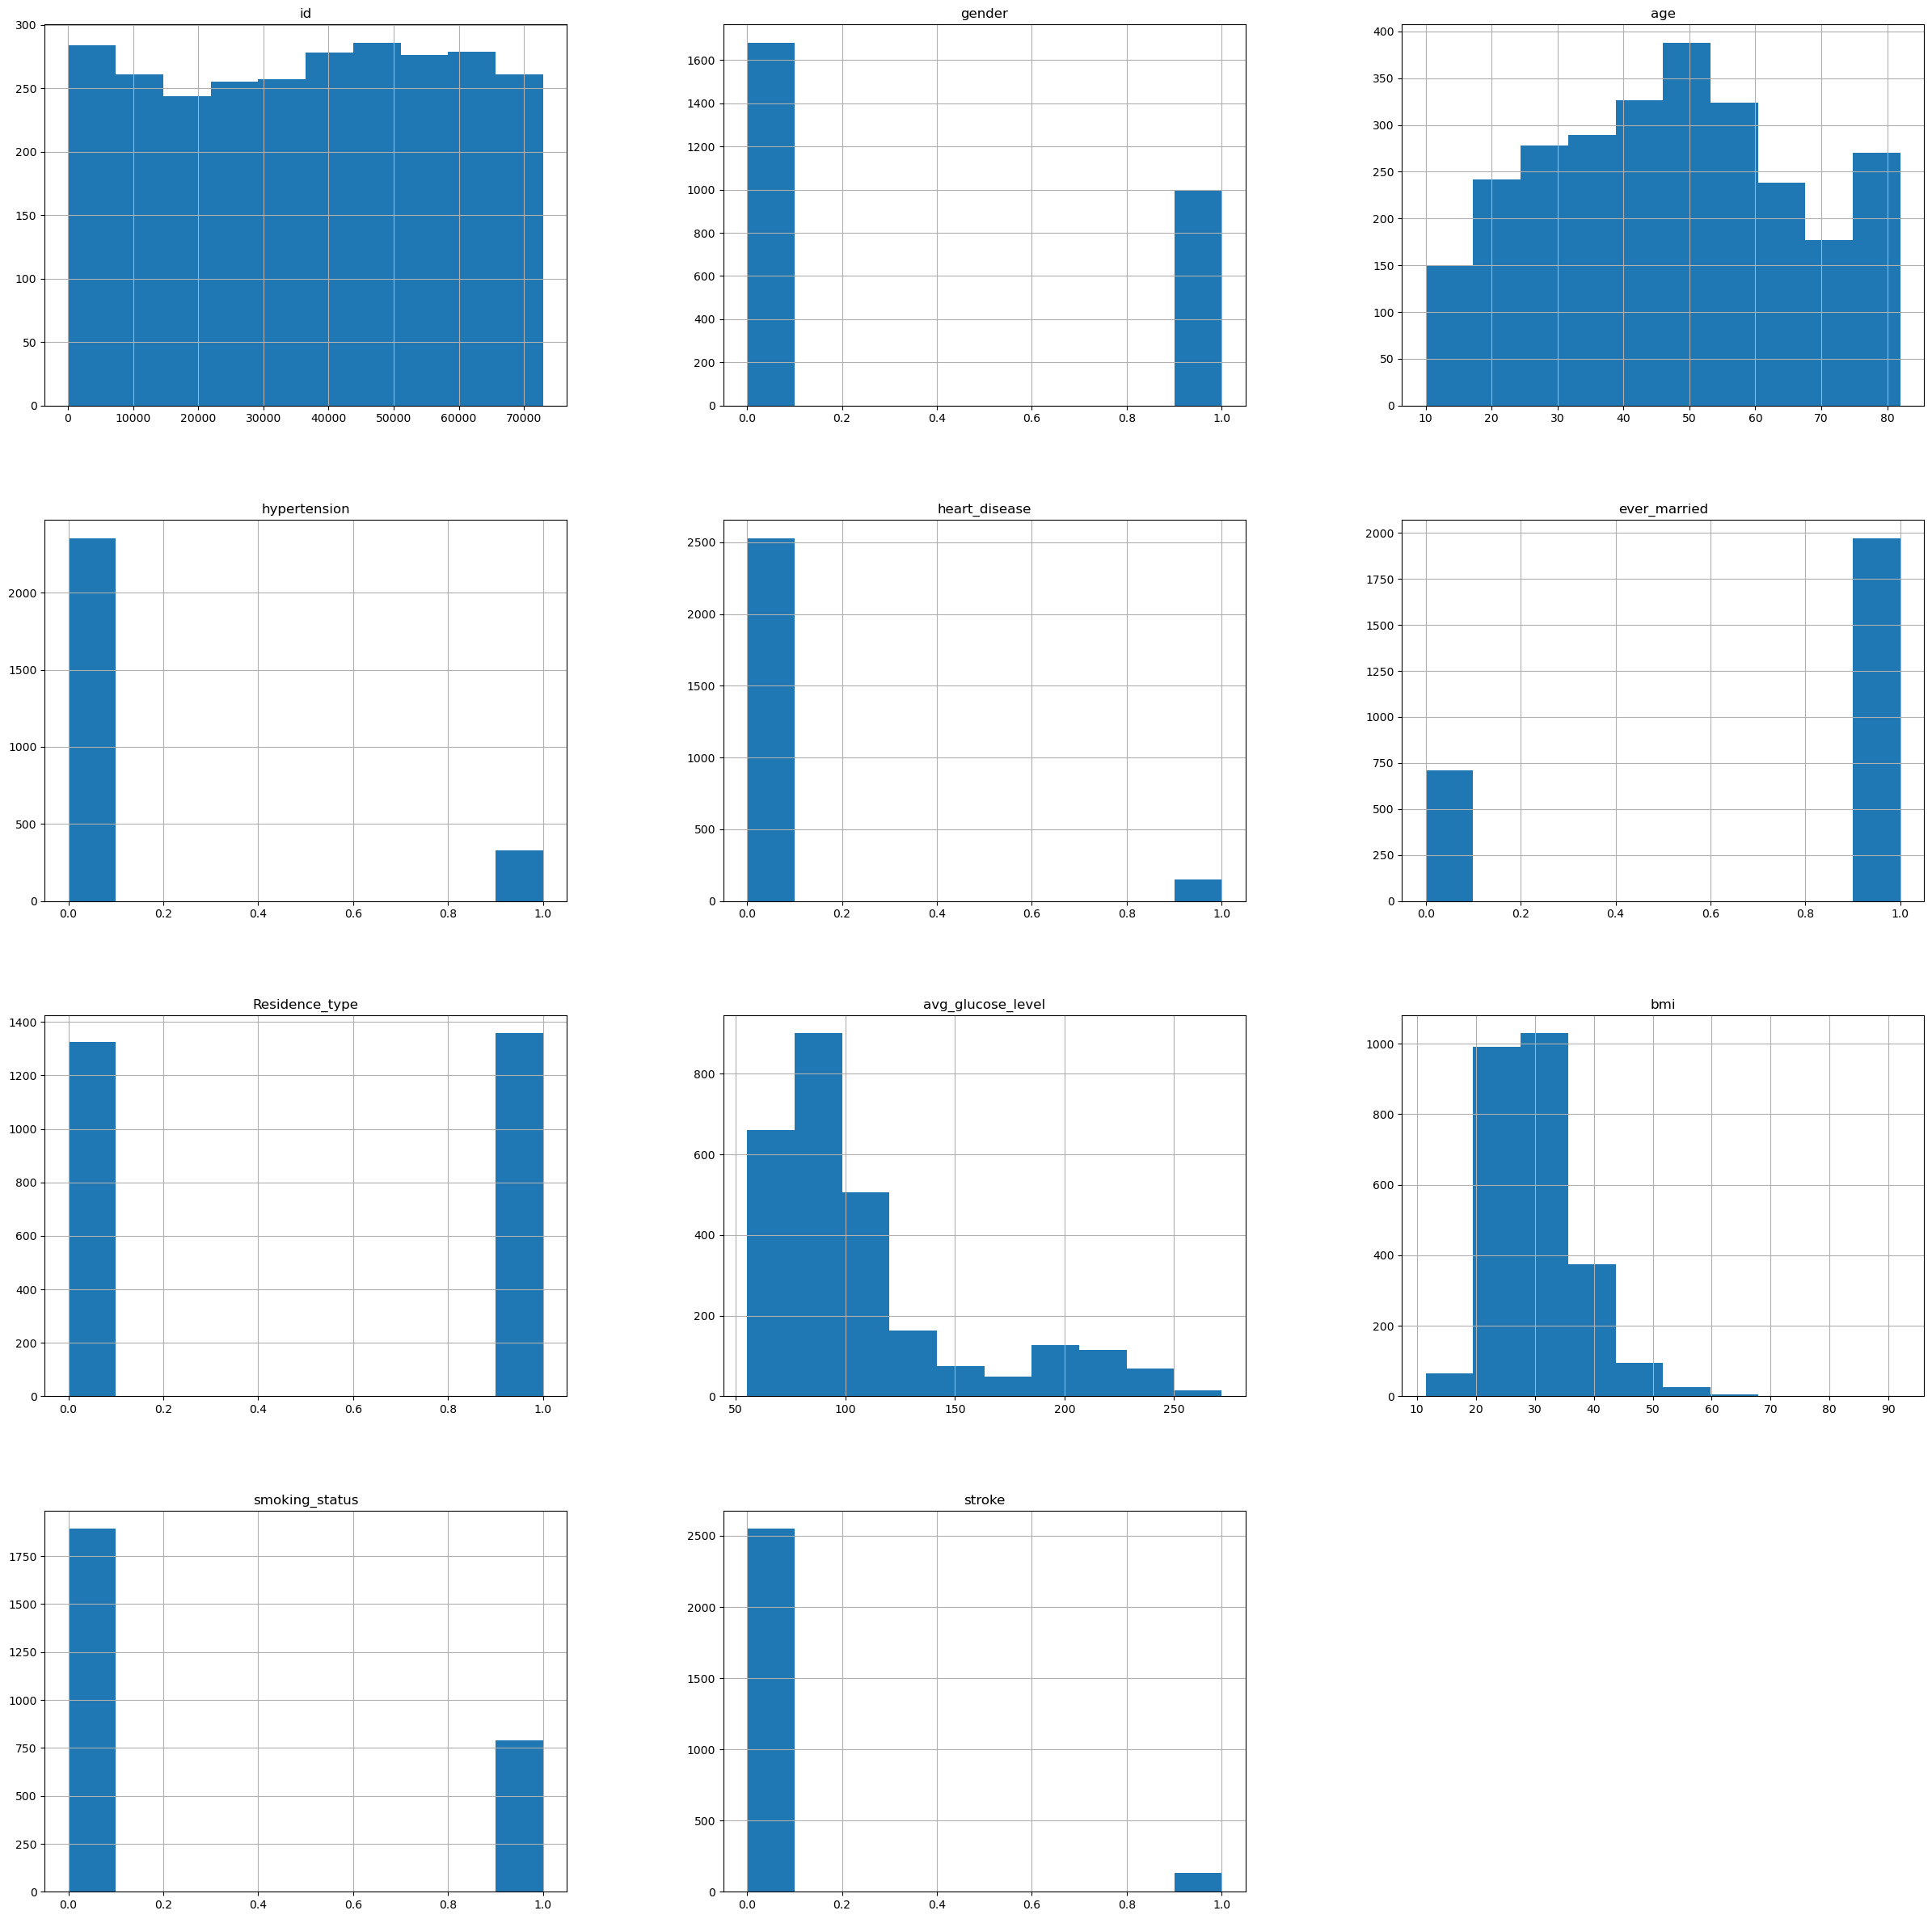

In [8]:
df.hist(bins = 10, figsize = (30,30))
plt.show()

### From the heatmap, we can observe that the features with highest correlation to stroke are ranked: age (0.25), heart_disease (0.15), hypertension (0.14), avg_glucose_level (0.13).

## Machine Learning 

In [25]:
X = df[['age','heart_disease', 'hypertension', 'avg_glucose_level']]
Y = df['stroke']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# K-nearest neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)
print("Train Accuracy: ", accuracy_score(Y_train, knn_pred_train))
print("Test Accuracy: ", accuracy_score(Y_test, knn_pred_test)) 

knn_acc = accuracy_score(Y_test, knn_pred_test)


Train Accuracy:  0.9471046770601337
Test Accuracy:  0.9570621468926553


Let's now plot the relationship between the k-values and our model's accuracy score

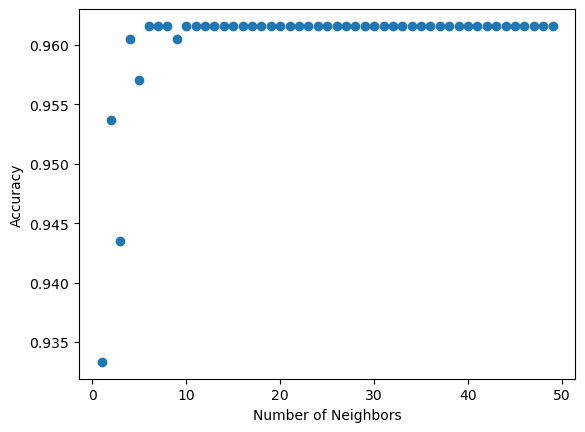

In [26]:
accuracy = []
for k in range (1, 50):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    accuracy.append(accuracy_score(Y_test, predictions))
    
#create plot
k_values = []
for i in range (1, 50):
    k_values.append([i])
plt.scatter(x=k_values, y=accuracy)

#labelling axes
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

**optimizing knn model**
after plotting the k-values relationship with the accuracies, we can see that the accuracy can be optimized further by choosing, for instance, a k-value of 10. Let us now remake the kNN model:

In [32]:
#finetune knn model further by manipulating k value to be 10
knn = KNeighborsClassifier(10)
knn.fit(X_train, Y_train)
knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)
print("Train Accuracy: ", accuracy_score(Y_train, knn_pred_train))
print("Test Accuracy: ", accuracy_score(Y_test, knn_pred_test)) 

knn_acc = accuracy_score(Y_test, knn_pred_test)


Train Accuracy:  0.9454342984409799
Test Accuracy:  0.9615819209039548


*Notice how the testing value has increased the testing accuracy a bit from 0.959 to 0.962.*

In [33]:
# This is the function we use to create the decision tree model 
model = tree.DecisionTreeClassifier(max_depth = 5)

# TODO: train the model
model.fit(X_train, Y_train)

# TODO:  Calculate the training and testing accuracy
dtree_pred_train = model.predict(X_train)
dtree_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(Y_train, dtree_pred_train)
test_accuracy = accuracy_score(Y_test, dtree_pred_test)

print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

dtree_acc = accuracy_score(Y_test, dtree_pred_test)


Train Accuracy:  0.950445434298441
Test Accuracy:  0.9570621468926553


In [39]:
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)

forest_prediction = forest.predict(X_test)

pred_train = forest.predict(X_train)
pred_test = forest.predict(X_test)

print("Test Accuracy: ", accuracy_score(Y_test, pred_test))
print("Training Accuracy: ", accuracy_score(Y_train, pred_train))

forest_acc = accuracy_score(Y_test, pred_test)

Test Accuracy:  0.9581920903954803
Training Accuracy:  1.0


Let's look at the confusion matrix for our error analysis from the random forest model:

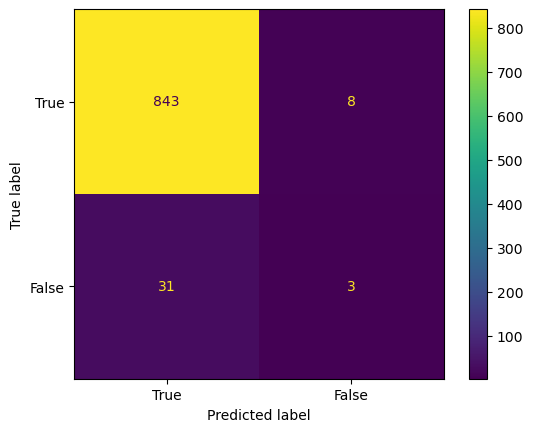

In [35]:
conf = confusion_matrix(Y_test, forest.predict(X_test))
conf_display = ConfusionMatrixDisplay(confusion_matrix = conf, display_labels=[True, False])
conf_display.plot()

plt.show()

In [36]:
print("sensitivity:", ((843)/(843+8)))
print("specificity:", ((3)/(3+31)))
print("accuracy:", ((843+3)/885))
print("error:", ((31+8)/885))
print("precision:", ((843/(843+31))))

sensitivity: 0.9905992949471211
specificity: 0.08823529411764706
accuracy: 0.9559322033898305
error: 0.04406779661016949
precision: 0.9645308924485125


From the matrix, we can observe the following:
*True positive (stroke and correctly predicted):* 843
*True negative (no stroke and correctly predicted):* 3
*False positive (no stroke and incorrectly predicted):* 31
*False negative (stroke and incorrectly predicted):* 8

It is interesting to note that the specificity score of the model is quite low, we learned in class that this likely means that the model does poorly in correctly identifying negatives.

Now, let us look at the logistic regression model for our dataset:

In [37]:
log = LogisticRegression()
log.fit(X_train, Y_train)

lpred_train = log.predict(X_train)
lpred_test = log.predict(X_test)

print("Test Accuracy: ", accuracy_score(Y_test, lpred_test))
print("Training Accuracy: ", accuracy_score(Y_train, lpred_train))

log_acc = accuracy_score(Y_test, lpred_test)

Test Accuracy:  0.9627118644067797
Training Accuracy:  0.9448775055679287


Now with all our models built, let us visualize the comparison of their accuracies:

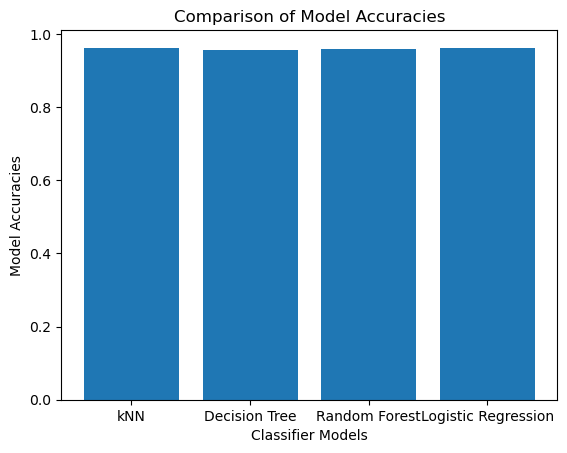

[0.9615819209039548, 0.9570621468926553, 0.9581920903954803, 0.9627118644067797]


In [40]:
accuracies = [knn_acc, dtree_acc, forest_acc, log_acc]
models = ['kNN', 'Decision Tree', 'Random Forest', 'Logistic Regression']

plt.bar(models, accuracies)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Classifier Models')
plt.ylabel('Model Accuracies')

plt.show()

print(accuracies)


We can see that the logistic regression model produced the highest accuracy score of 0.963 while the Decison tree model produced the lowest accuracy score of 0.957 out of the four models we implemented. Accuracies were pretty similar across the board.

### Analysis

Our results show that the KNN and Log models are most accurate. By using the features that had the most correlation to stroke probability: heart_disease, hypertension, and avg_glucose_level, we were able to test the data in the above machine learning models to see the stoke rates.

This project answers our questions where the older person had a higher rate of having a stroke and underlying symptoms from heart disease, hypertension, and high glucose levels contributed to its increasing rate. 

For future analysis, additional features such as socioeconomic status or annual earnings could provide more accurate results toward applications of this machine learning model on real life. 